# Análisis de ventas en un comercio electrónico: Exploración de datos y tendencias

El objetivo de este análisis es examinar el conjunto de datos de un comercio electrónico para comprender las tendencias de ventas, identificar los productos más populares, evaluar el desempeño de los países en términos de transacciones y generación de ingresos, así como analizar la distribución temporal de las ventas. Las nueve preguntas planteadas guiarán el análisis para obtener información relevante sobre la actividad comercial y las preferencias de los clientes.

# Importacion de los archivo a analizar

In [117]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Obtiene el directorio actual
directorio_actual = os.getcwd()

# Nombre del archivo CSV que se desea abrir
nombre_archivo = "ecommerce_data.csv"

# Se Construye la ruta completa del archivo utilizando os.path.join
ruta_completa = os.path.join(directorio_actual, nombre_archivo)

# Verifico si el archivo existe antes de intentar abrirlo
if os.path.exists(ruta_completa):
    try:
        
        df = pd.read_csv(ruta_completa, encoding='latin1') 
        
    except Exception as e:
        print(f"Error al leer el archivo CSV: {e}")
else:
    print(f"El archivo {nombre_archivo} no existe en el directorio actual.")


In [118]:
type(df)

pandas.core.frame.DataFrame

In [119]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [120]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [121]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [122]:
df.shape

(541909, 8)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [124]:
df.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [125]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [126]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# Limpieza de Datos

In [127]:
df.duplicated().any()

True

In [128]:
df.dropna(inplace = True)

In [129]:
df.shape

(406829, 8)

In [130]:
df.drop_duplicates(inplace = True)

In [131]:
df.shape

(401604, 8)

In [132]:
df.duplicated().any()

False

In [133]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# Exploracion de los datos a analizar

¿Cuál es la cantidad total de productos vendidos?

In [134]:
# Convertir la columna 'InvoiceDate' a formato de fecha

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [135]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [136]:
#Cantidad de Producto Vendidos
total_producto_vendidos = df['Quantity'].sum()
print("Cantidad de Productos Vendidos",total_producto_vendidos)

Cantidad de Productos Vendidos 4892851


¿Cuál es el producto más vendido?

In [137]:
producto_mas_vendido = df.groupby('Description')['Quantity'].sum().idxmax()
print("El Producto mas Vendido es",producto_mas_vendido)

El Producto mas Vendido es WORLD WAR 2 GLIDERS ASSTD DESIGNS


¿Cuál es el país con el mayor número de transacciones?

In [138]:
transacciones_por_pais = df['Country'].value_counts()
pais_con_mas_transacciones =  transacciones_por_pais.idxmax()
print("Pais con el mayor numero de transacciones es",pais_con_mas_transacciones)

Pais con el mayor numero de transacciones es United Kingdom


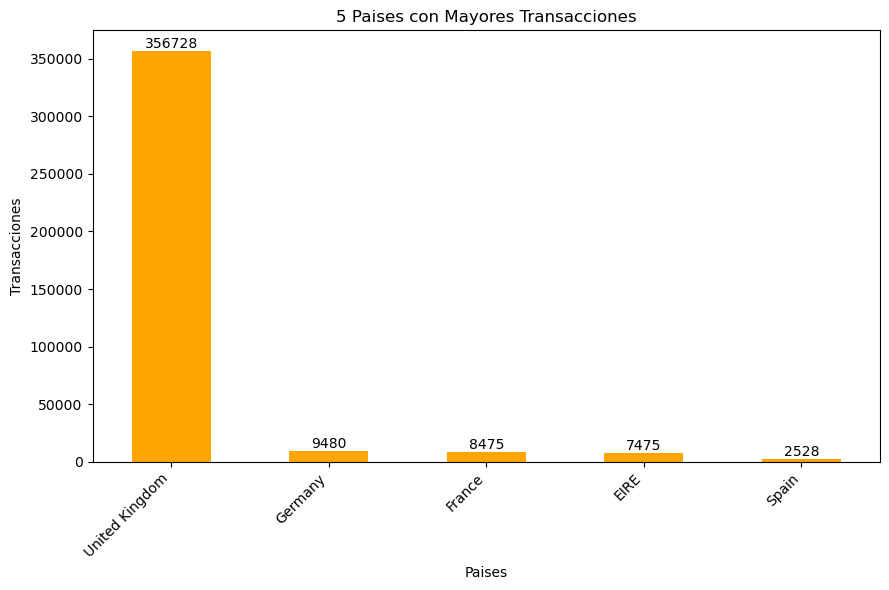

In [139]:
#Dato Adicional los 5 paises con mayores transacciones
top5_paises = transacciones_por_pais.head(5)

plt.figure(figsize=(9,6))
top5_paises.plot(kind = 'bar',color = 'orange')
plt.title('5 Paises con Mayores Transacciones')
plt.xlabel('Paises')
plt.ylabel('Transacciones')
plt.xticks(rotation = 45,ha = 'right')

# Agrego Etiqueta de los datos encima de la barras
for i, value in enumerate(top5_paises):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

¿Cuál es la cantidad promedio de productos por transacción?

In [140]:
cantidad_de_producto_por_transaccion = df.groupby('InvoiceNo')['Quantity'].sum().mean()
print("Cantidad promedio de productos por transaccion es: ",cantidad_de_producto_por_transaccion)

Cantidad promedio de productos por transaccion es:  220.498017124831


¿Cuál es el promedio de ingresos por transacción?

In [141]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
ingresos_promedio_por_transaccion = df.groupby('InvoiceNo')['TotalPrice'].sum().mean()

print("Promedio de ingresos por transaccion:",ingresos_promedio_por_transaccion)

Promedio de ingresos por transaccion: 373.07433186120386


¿Cuál es el cliente que más gasta en total?

In [142]:
cliente_gasto = df.groupby('CustomerID')['TotalPrice'].sum()
top_cliente_gastador = cliente_gasto.idxmax()
print("El Cliente que mas gasta es: ",top_cliente_gastador)

El Cliente que mas gasta es:  14646.0


¿Cuál es el producto más caro?

In [143]:
producto_mas_caro = df.groupby('Description')['TotalPrice'].max().idxmax()
print("El Producto mas caro: ",producto_mas_caro)

El Producto mas caro:  PAPER CRAFT , LITTLE BIRDIE


¿Cuál es la distribución de las ventas a lo largo del tiempo (diaria, mensual, anual)?

In [145]:
df.set_index('InvoiceDate', inplace=True)
sales_daily = df.resample('D')['TotalPrice'].sum()
sales_monthly = df.resample('M')['TotalPrice'].sum()
sales_annual = df.resample('Y')['TotalPrice'].sum()

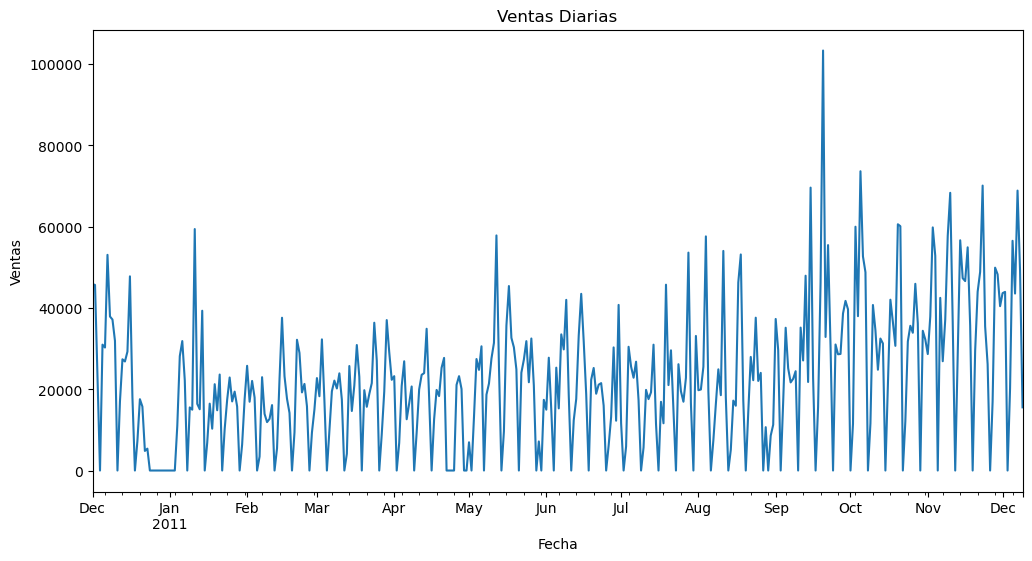

In [146]:
# Gráfica de ventas diarias
plt.figure(figsize=(12, 6))
sales_daily.plot(kind='line')
plt.title('Ventas Diarias')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.show()

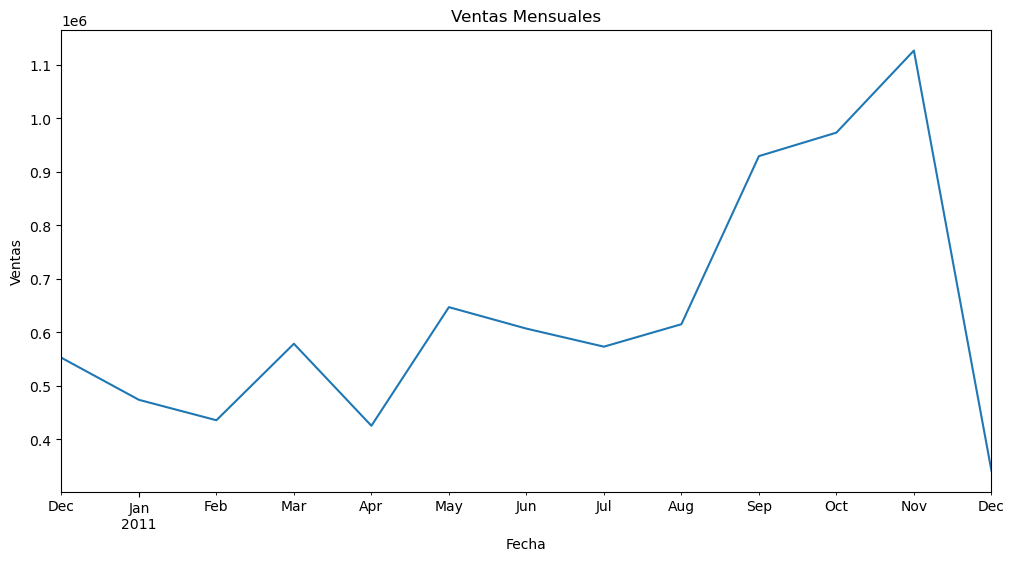

In [148]:
# Gráfica de ventas mensuales
plt.figure(figsize=(12, 6))
sales_monthly.plot(kind='line')
plt.title('Ventas Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.show()

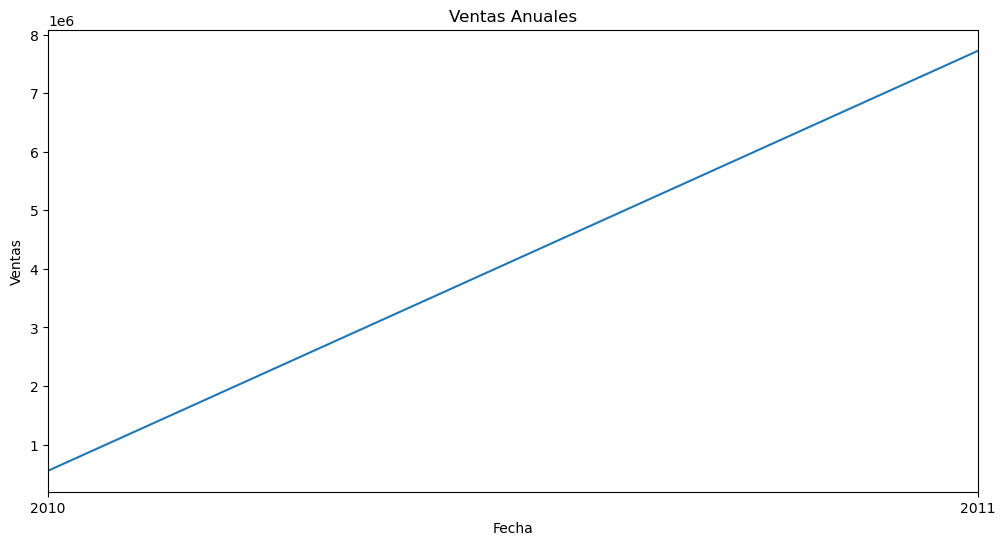

In [149]:
# Gráfica de ventas anuales
plt.figure(figsize=(12, 6))
sales_annual.plot(kind='line')
plt.title('Ventas Anuales')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.show()

¿Cuál es el país que genera más ingresos en total?

In [153]:
paises = df.groupby('Country')['TotalPrice'].sum()
pais_con_mayor_ingreso = paises.idxmax()
print("País que genera más ingresos en total es", pais_con_mayor_ingreso)

País que genera más ingresos en total es United Kingdom


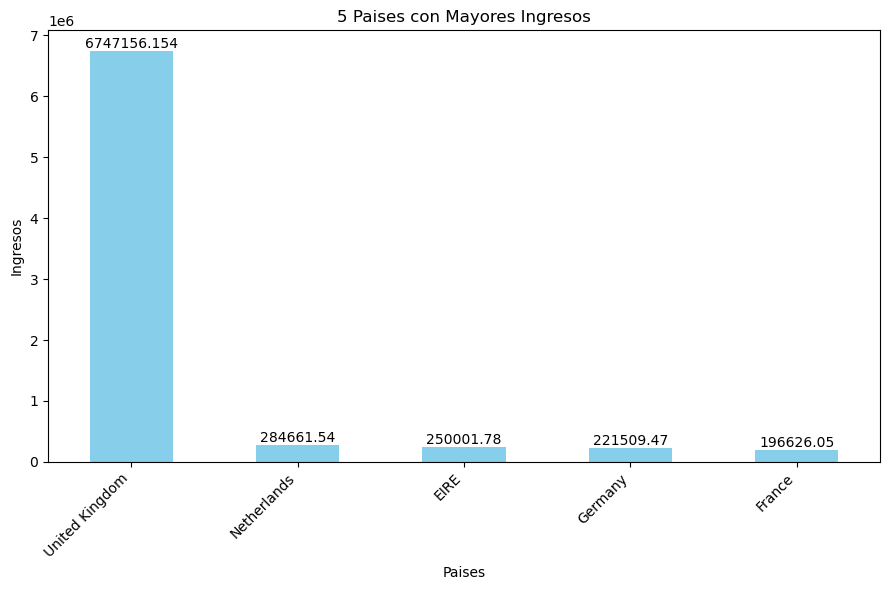

In [174]:
#5 Paises que genera mas ingresos en total

top5_paises = paises.sort_values(ascending = False).head(5)

plt.figure(figsize=(9,6))
top5_paises.plot(kind = 'bar',color = 'skyblue')
plt.title('5 Paises con Mayores Ingresos')
plt.xlabel('Paises')
plt.ylabel('Ingresos')
plt.xticks(rotation = 45,ha = 'right')

# Agrego Etiqueta de los datos encima de la barras
for i, value in enumerate(top5_paises):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [175]:
df.to_csv('ecommerce_clean.csv', index=False)